In [1]:
import numpy as np   
from numpy import arange
import pandas as pd    
import seaborn as sns

import matplotlib.pyplot as plt   
import matplotlib.style

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_auc_score, roc_curve

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from mlxtend.evaluate import bias_variance_decomp

## Problem 1  ML Technique - Ensemble model

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
df_elec = pd.read_excel("Election_Data.xlsx", sheet_name = 'Election_Dataset_Two Classes')

In [3]:
df_elec.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df_elec = df_elec.drop('Unnamed: 0', axis = 1)

In [5]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df_elec.shape

(1525, 9)

In [7]:
df_elec.duplicated().sum()

8

In [8]:
df_elec.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
df_elec.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [10]:
for column in df_elec.columns:
    if df_elec[column].dtype == 'object':
        print(column.upper(),': ',df_elec[column].nunique())
        print(df_elec[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [11]:
for feature in df_elec.columns: 
    if df_elec[feature].dtype == 'object':
        df_elec[feature] = pd.Categorical(df_elec[feature]).codes   

In [12]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

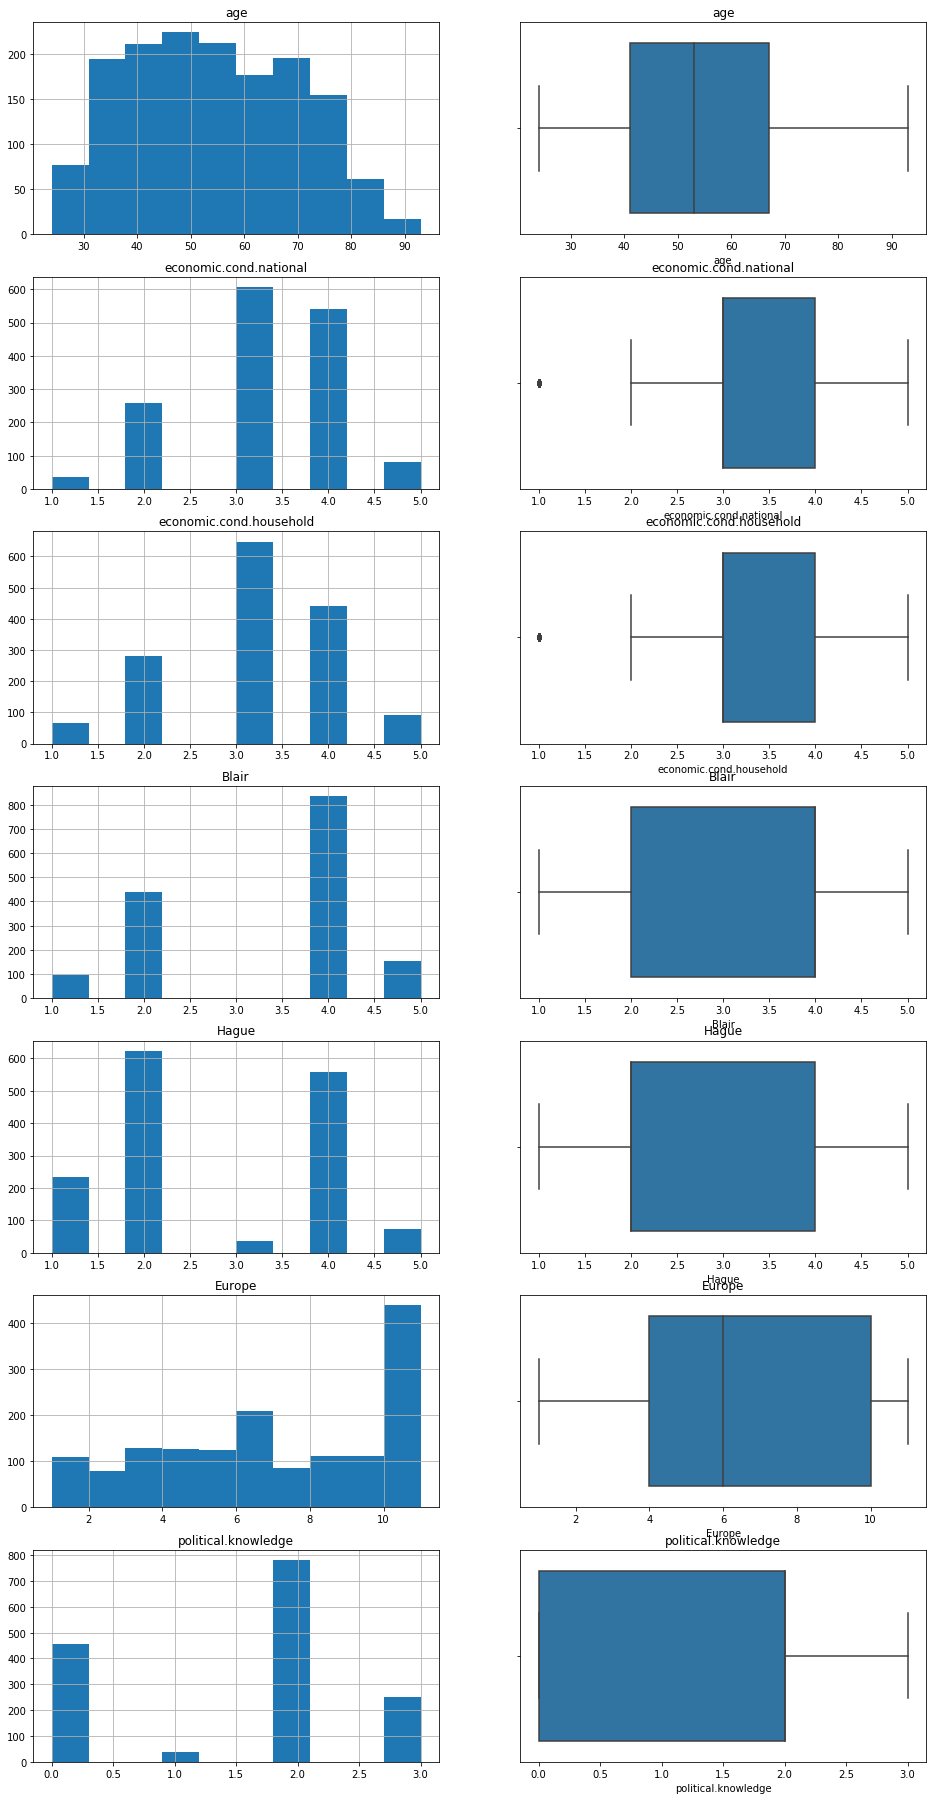

In [13]:
fig, axes = plt.subplots(nrows = 7, ncols = 2)
fig.set_size_inches(16, 32)

cont = df_elec.dtypes[(df_elec.dtypes == 'int64')|(df_elec.dtypes == 'float64')].index

df_elec2 = df_elec[cont]

for i in range(0,len(df_elec2.columns)):
    a = df_elec2[df_elec2.columns[i]].hist(ax = axes[i][0]) 
    a.set_title(df_elec2.columns[i],fontsize=12)
    a = sns.boxplot(df_elec2[df_elec2.columns[i]] , orient = "h" , ax = axes[i][1])
    a.set_title(df_elec2.columns[i],fontsize = 12)

plt.show()

In [14]:
df_elec.skew(axis = 0, skipna = True)

vote                      -0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

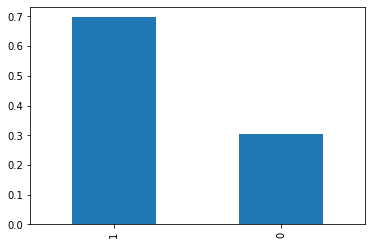

In [15]:
df_elec['vote'].value_counts(normalize = True).plot(kind = 'bar')

plt.show()

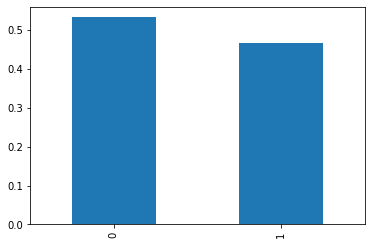

In [16]:
df_elec['gender'].value_counts(normalize = True).plot(kind = 'bar')

plt.show()

#### Bivariate Analysis

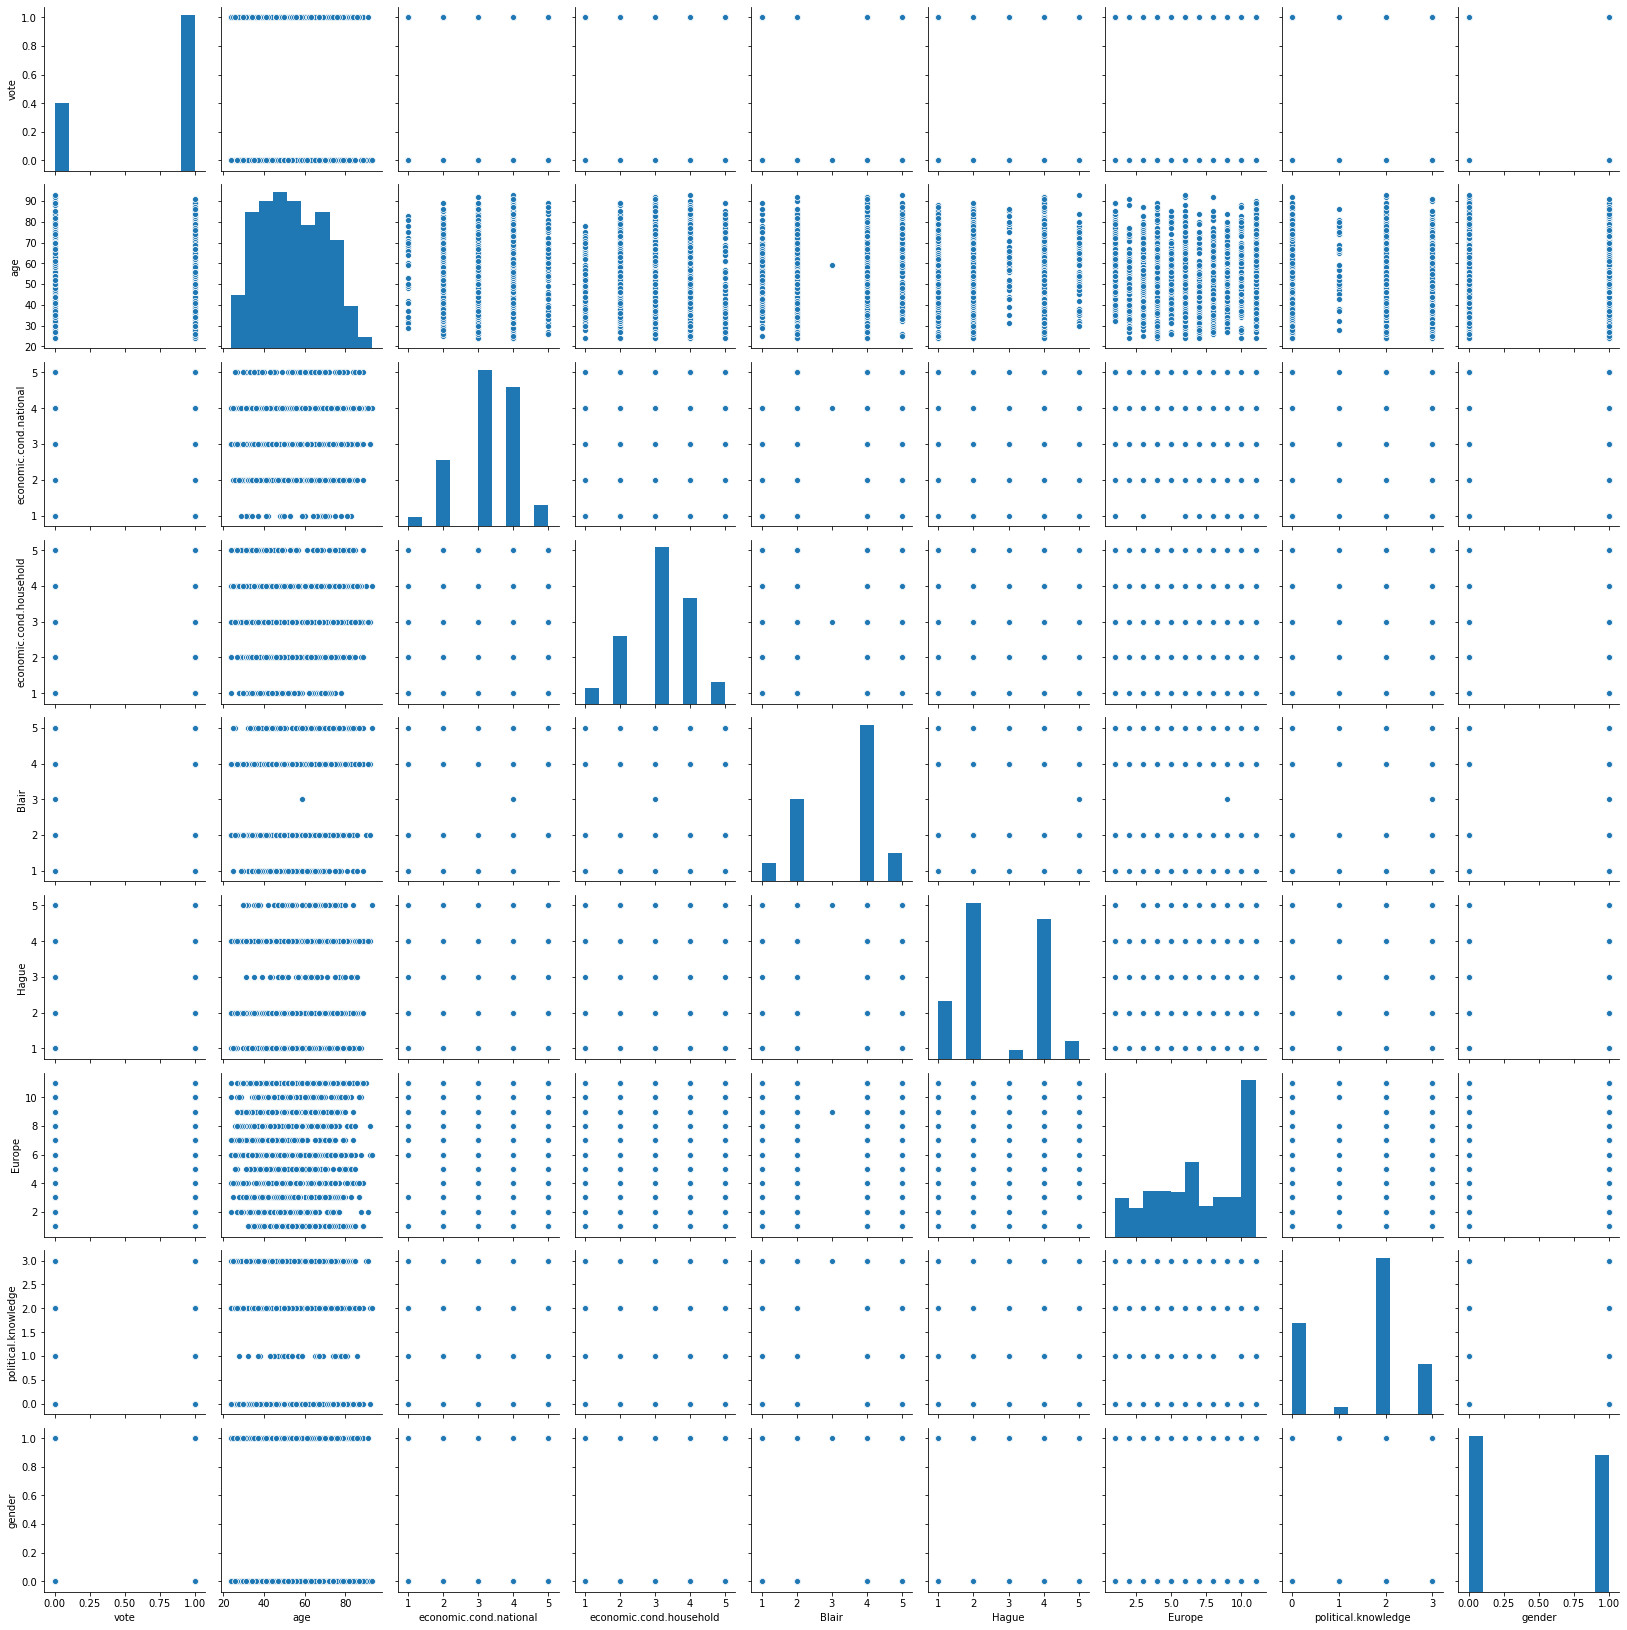

In [17]:
sns.pairplot(df_elec)

plt.show()

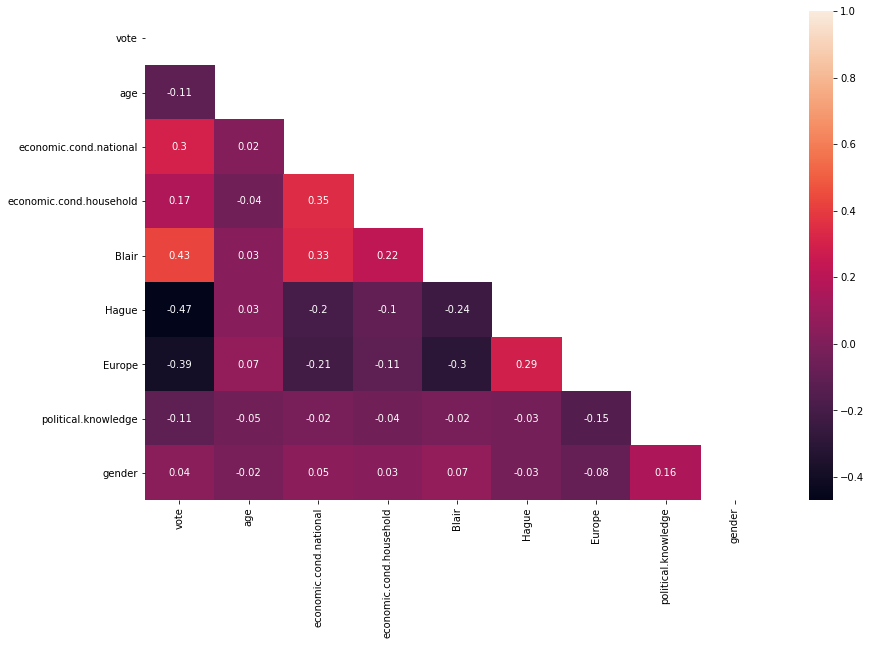

In [18]:
corr = df_elec.corr()

fig_dims = (14, 9)
fig = plt.subplots(figsize = fig_dims)
mask = np.triu(np.ones_like(corr, dtype = np.bool)) 
sns.heatmap(round(corr,2), annot = True, mask = mask)
plt.show()

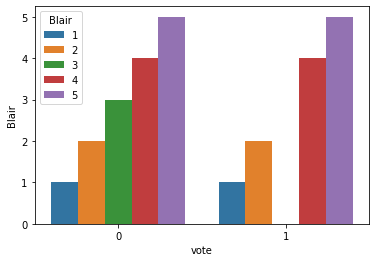

In [19]:
sns.barplot(x = 'vote', y = 'Blair', hue = 'Blair', data = df_elec)

plt.show()

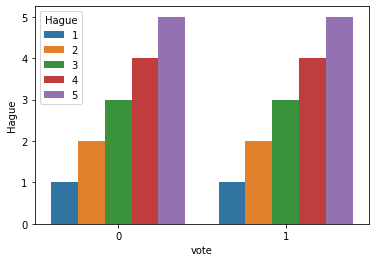

In [20]:
sns.barplot(x = 'vote', y = 'Hague', hue = 'Hague', data = df_elec)

plt.show()

#### Multivariate Analysis

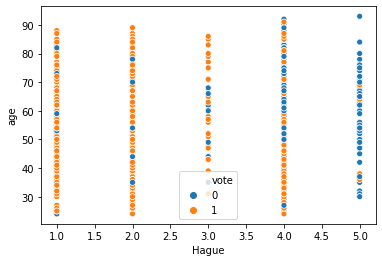

In [21]:
sns.scatterplot(x = 'Hague', y = 'age', hue = 'vote', data = df_elec)

plt.show()

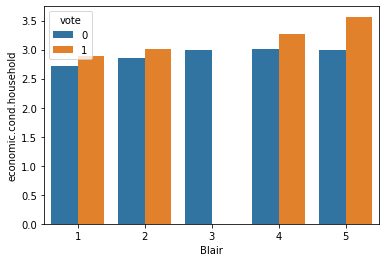

In [22]:
sns.barplot(x = 'Blair', y = 'economic.cond.household', hue = 'vote', data = df_elec, ci = None)

plt.show()

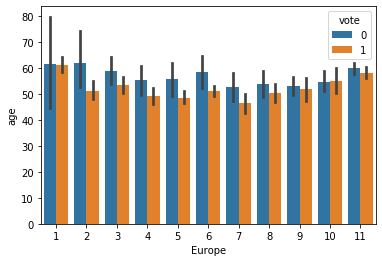

In [23]:
sns.barplot(x = 'Europe', y = 'age', hue = 'vote', data = df_elec)

plt.show()

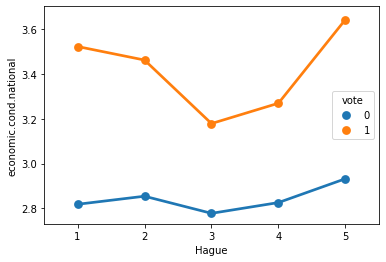

In [24]:
sns.pointplot(x = 'Hague', y = 'economic.cond.national', hue = 'vote', data = df_elec, ci = None)

plt.show()

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

- Scaling is not necessary for logistic regression, LDA and Naive Bayes models.
- It should be done for KNN model and Random forest algorithm.

In [25]:
X = df_elec.drop("vote", axis=1)
y = df_elec['vote']

In [26]:
df_elec['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [28]:
LRmod = LogisticRegression()

param_grid = [
    {
    'solver' : ['liblinear'],
    'penalty' : ['l2','l1'],
    'tol' : [0.0001, 0.00001],
    'C' : [1],
    'intercept_scaling' : [1.0] }                       
    ]

grid_search = GridSearchCV(estimator = LRmod, param_grid = param_grid, cv = 5,  n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())

print(grid_search.best_params_)

bgmod = grid_search.best_estimator_
bgmod

{'C': 1, 'intercept_scaling': 1.0, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


LogisticRegression(C=1, intercept_scaling=1.0, penalty='l1', solver='liblinear')

In [29]:
y_trainpred = bgmod.predict(X_train)

modscore = bgmod.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.8416119962511716


[[231 101]
 [ 68 667]]


              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [30]:
bgmod.fit(X_train, y_train.values.ravel())

ytrainpred = bgmod.predict(X_train)
ytestpred = bgmod.predict(X_test)

modscore = bgmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, ytestpred))
print("\n")
print(metrics.classification_report(y_test, ytestpred))

ytestpredprob = bgmod.predict_proba(X_test)

0.8209606986899564


[[ 85  45]
 [ 37 291]]


              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [31]:
clf = LinearDiscriminantAnalysis()

grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
grid['shrinkage'] = arange(0, 1, 0.01)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
print("cv ",cv)

search = GridSearchCV(clf, grid, scoring = 'accuracy', cv = cv, n_jobs = -1)
search.fit(X_train, y_train.values.ravel())

print(search.best_params_)
print(search.best_score_)

bgclf = search.best_estimator_
bgclf

cv  RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
{'shrinkage': 0.01, 'solver': 'lsqr'}
0.8372773761241401


LinearDiscriminantAnalysis(shrinkage=0.01, solver='lsqr')

In [32]:
y_trainpredclf = bgclf.predict(X_train)

modscore = bgclf.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpredclf))
print("\n")
print(metrics.classification_report(y_train, y_trainpredclf))

0.8425492033739457


[[226 106]
 [ 62 673]]


              precision    recall  f1-score   support

           0       0.78      0.68      0.73       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [33]:
y_testpredclf = bgclf.predict(X_test)

modscore = bgclf.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpredclf))
print("\n")
print(metrics.classification_report(y_test, y_testpredclf))

0.8275109170305677


[[ 85  45]
 [ 34 294]]


              precision    recall  f1-score   support

           0       0.71      0.65      0.68       130
           1       0.87      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.83       458



### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.
#### KNN Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [35]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
KNNmod = KNeighborsClassifier()
KNNmod.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_trainpred = KNNmod.predict(X_train)

modscore = KNNmod.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.8631677600749765


[[248  84]
 [ 62 673]]


              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [38]:
y_testpred = KNNmod.predict(X_test)

modscore = KNNmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.8253275109170306


[[ 92  38]
 [ 42 286]]


              precision    recall  f1-score   support

           0       0.69      0.71      0.70       130
           1       0.88      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



#### Naive Bees Model

In [39]:
NBmod = GaussianNB()
NBmod.fit(X_train, y_train)

GaussianNB()

In [40]:
y_trainpred = NBmod.predict(X_train)

modscore = NBmod.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.8331771321462043


[[240  92]
 [ 86 649]]


              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [41]:
y_testpred = NBmod.predict(X_test)

modscore = NBmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.8253275109170306


[[ 94  36]
 [ 44 284]]


              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [42]:
DTmod= tree.DecisionTreeClassifier()

DTmod.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_trainpred = DTmod.predict(X_train)

modscore = DTmod.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.9990627928772259


[[332   0]
 [  1 734]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [44]:
y_testpred = DTmod.predict(X_test)

modscore = DTmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.759825327510917


[[ 81  49]
 [ 61 267]]


              precision    recall  f1-score   support

           0       0.57      0.62      0.60       130
           1       0.84      0.81      0.83       328

    accuracy                           0.76       458
   macro avg       0.71      0.72      0.71       458
weighted avg       0.77      0.76      0.76       458



#### Random Forest Model

In [45]:
RFmod = RandomForestClassifier(n_estimators = 100, random_state = 1)

RFmod.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [46]:
y_trainpred = RFmod.predict(X_train)

modscore =RFmod.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.9990627928772259


[[331   1]
 [  0 735]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [47]:
y_testpred = RFmod.predict(X_test)

modscore = RFmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.8187772925764192


[[ 90  40]
 [ 43 285]]


              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



#### Bagging Classifier

In [48]:
RFmod = RandomForestClassifier(n_estimators = 100, random_state = 1)

Baggingmod = BaggingClassifier(base_estimator = RFmod, n_estimators = 100, random_state = 1)

Baggingmod.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [49]:
y_trainpred = Baggingmod.predict(X_train)

modscore = Baggingmod.score(X_train, y_train)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.9653233364573571


[[304  28]
 [  9 726]]


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [50]:
y_testpred = Baggingmod.predict(X_test)

modscore = Baggingmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.8362445414847162


[[ 92  38]
 [ 37 291]]


              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



#### Adaboosting

In [51]:
clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)

y_trainpred = clfADB.predict(X_train)

modscoreADB = clfADB.score(X_train, y_train)

print(modscoreADB)
print(metrics.confusion_matrix(y_train, y_trainpred))
print(metrics.classification_report(y_train, y_trainpred))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [52]:
y_pred = clfADB.predict(X_test)

modscoreADB = clfADB.score(X_test, y_test)

print(modscoreADB)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_testpred))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



#### Gradient Boosting

In [53]:
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [54]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_trainpred = gbcl.predict(X_train)

modscoregbcl = gbcl.score(X_train, y_train)

print(modscoregbcl)
print("\n")
print(metrics.confusion_matrix(y_train, y_trainpred))
print("\n")
print(metrics.classification_report(y_train, y_trainpred))

0.8734770384254921


[[250  82]
 [ 53 682]]


              precision    recall  f1-score   support

           0       0.83      0.75      0.79       332
           1       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [55]:
y_pred = gbcl.predict(X_test)

print(gbcl.score(X_test, y_test))
print("\n")
print(metrics.confusion_matrix(y_test, y_pred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.8362445414847162


[[ 97  33]
 [ 42 286]]


              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



#### Naive Bees with SMOTE

In [56]:
sm = SMOTE(random_state = 2)
X_trainres, y_trainres = sm.fit_sample(X_train, y_train.ravel())

In [57]:
X_trainres.shape

(1470, 8)

In [58]:
NBSMmod = GaussianNB()
NBSMmod.fit(X_trainres, y_trainres)

GaussianNB()

In [59]:
y_trainpred = NBSMmod.predict(X_trainres)

modscore = NBSMmod.score(X_trainres, y_trainres)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_trainres, y_trainpred))
print("\n")
print(metrics.classification_report(y_trainres ,y_trainpred))

0.8231292517006803


[[597 138]
 [122 613]]


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       735
           1       0.82      0.83      0.83       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [60]:
y_testpred = NBSMmod.predict(X_test)

modscore = NBSMmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.7947598253275109


[[103  27]
 [ 67 261]]


              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.79       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.79      0.80       458



#### KNN with SMOTE

In [61]:
KNNSMmod = KNeighborsClassifier()

KNNSMmod.fit(X_trainres,y_trainres)

KNeighborsClassifier()

In [62]:
y_trainpred = KNNSMmod.predict(X_trainres)

modscore = KNNSMmod.score(X_trainres, y_trainres)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_trainres, y_trainpred))
print("\n")
print(metrics.classification_report(y_trainres, y_trainpred))

0.8863945578231293


[[688  47]
 [120 615]]


              precision    recall  f1-score   support

           0       0.85      0.94      0.89       735
           1       0.93      0.84      0.88       735

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470



In [63]:
y_testpred = KNNSMmod.predict(X_test)

modscore = KNNSMmod.score(X_test, y_test)

print(modscore)
print("\n")
print(metrics.confusion_matrix(y_test, y_testpred))
print("\n")
print(metrics.classification_report(y_test, y_testpred))

0.7794759825327511


[[106  24]
 [ 77 251]]


              precision    recall  f1-score   support

           0       0.58      0.82      0.68       130
           1       0.91      0.77      0.83       328

    accuracy                           0.78       458
   macro avg       0.75      0.79      0.75       458
weighted avg       0.82      0.78      0.79       458



### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized

AUC: 0.876


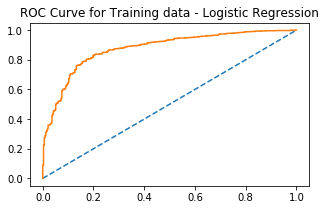

In [64]:
plt.figure(figsize=(5,3))
prob = bgmod.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - Logistic Regression")
plt.show()

AUC: 0.873


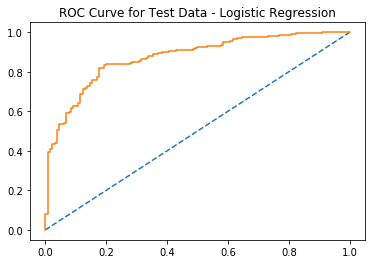

In [65]:
prob = bgmod.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Test Data - Logistic Regression")
plt.show()

AUC: 0.879


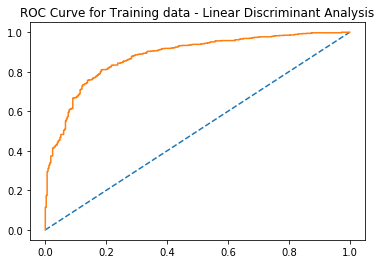

In [66]:
prob = bgclf.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - Linear Discriminant Analysis")
plt.show()

AUC: 0.883


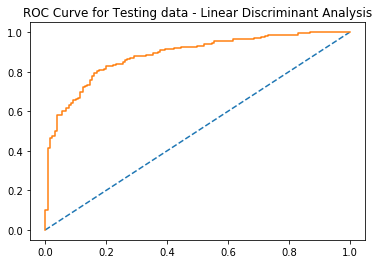

In [67]:
prob = bgclf.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Testing data - Linear Discriminant Analysis")
plt.show()

AUC: 0.886


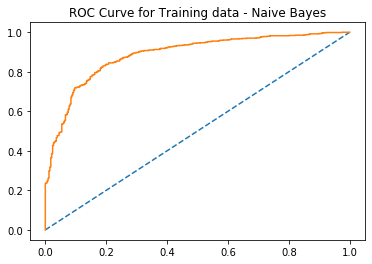

In [68]:
prob = NBmod.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - Naive Bayes")
plt.show()

AUC: 0.885


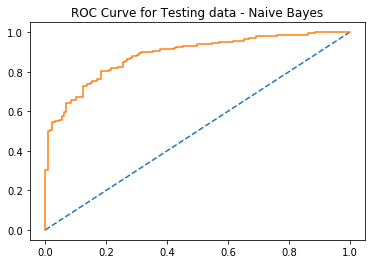

In [69]:
prob = NBmod.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Testing data - Naive Bayes")
plt.show()

AUC: 0.932


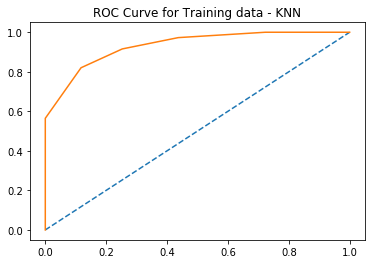

In [70]:
prob = KNNmod.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - KNN")
plt.show()

AUC: 0.871


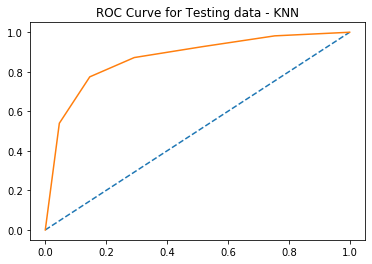

In [71]:
prob = KNNmod.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Testing data - KNN")
plt.show()

AUC: 0.997


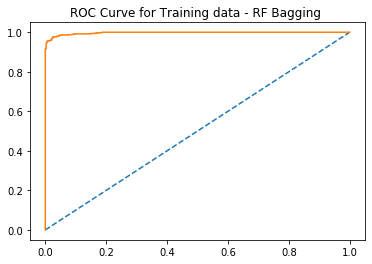

In [72]:
prob = Baggingmod.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - RF Bagging ")
plt.show()
          

AUC: 0.898


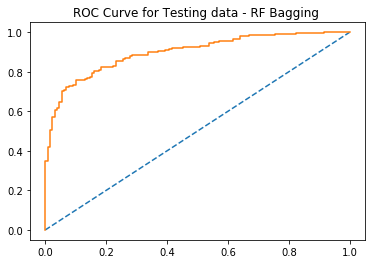

In [73]:
prob = Baggingmod.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Testing data - RF Bagging ")
plt.show()

AUC: 0.913


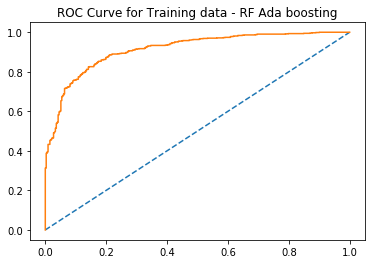

In [74]:
prob = clfADB.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - RF Ada boosting")
plt.show()

AUC: 0.879


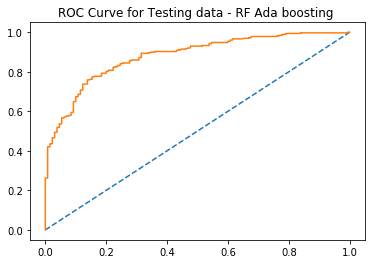

In [75]:
prob = clfADB.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Testing data - RF Ada boosting ")
plt.show()

AUC: 0.936


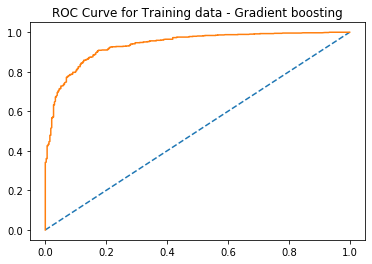

In [76]:
prob = gbcl.predict_proba(X_train)

prob = prob[:, 1]

lgr_train_auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % lgr_train_auc)

lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_train_fpr, lgr_train_tpr)
plt.title("ROC Curve for Training data - Gradient boosting")
plt.show()

AUC: 0.907


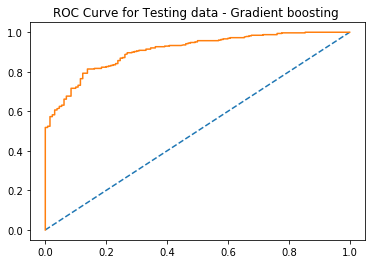

In [77]:
prob = gbcl.predict_proba(X_test)

prob = prob[:, 1]

lgr_test_auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % lgr_test_auc)

lgr_test_fpr,lgr_test_tpr, lgr_testthresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lgr_test_fpr, lgr_test_tpr)
plt.title("ROC Curve for Testing data - Gradient boosting ")
plt.show()

In [78]:
clfCVRF = RandomForestClassifier(n_estimators=100)

score = cross_val_score(clfCVRF, X_train, y_train, cv=10)

np.mean(score)

0.8116910597778171

### 1.8 Based on these predictions, what are the insights?
- Random Forest Model has the highest accuracy
- Many models are underfitted and overfitted
- Europe & Hague seem to be negatively correlated with getting votes
- Should focus more on countries with high economic conditions

## Problem 2

In [79]:
import numpy as np
import pandas as pd
import nltk
import random
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

nltk.download('inaugural')
from nltk.corpus import inaugural

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\MSELVA\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSELVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSELVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
len(inaugural.fileids())

58

In [81]:
X = inaugural.raw('1941-Roosevelt.txt')
Y = inaugural.raw('1961-Kennedy.txt')
Z = inaugural.raw('1973-Nixon.txt')

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [82]:
print("\n There were ", len(inaugural.sents(fileids='1941-Roosevelt.txt')), " sentences in President Roosevelt's speech.")

Xlist =  inaugural.words(fileids='1941-Roosevelt.txt')

print("\n There were ",len(Xlist), " words in President Roosevelt's speech.")
print("\n There were ", len(X), " characters in President Roosevelt's speech")


 There were  68  sentences in President Roosevelt's speech.

 There were  1536  words in President Roosevelt's speech.

 There were  7571  characters in President Roosevelt's speech


In [83]:
print("\n There were ", len(inaugural.sents(fileids='1961-Kennedy.txt')), " sentences in President Kennedy's speech.")

Ylist =  inaugural.words(fileids='1961-Kennedy.txt')

print("\n There are ", len(Ylist), " words in President Kennedy's speech.")
print("\n There are ", len(Y), " characters in President Kennedy's speech.")


 There were  52  sentences in President Kennedy's speech.

 There are  1546  words in President Kennedy's speech.

 There are  7618  characters in President Kennedy's speech.


In [84]:
print("\n There were ", len(inaugural.sents(fileids='1973-Nixon.txt')), " sentences in President Nixon's speech.")

Zlist =  inaugural.words(fileids='1973-Nixon.txt')

print("\n There are ", len(Zlist), " words in President Nixon's speech.")
print("\n There are ", len(Z), " characters in President Nixon's speech.")


 There were  69  sentences in President Nixon's speech.

 There are  2028  words in President Nixon's speech.

 There are  9991  characters in President Nixon's speech.


## 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [85]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    return tokens

In [86]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

Xmp = myTokenizer(X)
X_word = (w.lower() for w in Xmp)
X_wordclean = [word for word in X_word if word not in stopwords]

print("Before removing stopwords, the count is",  len(nltk.word_tokenize(X)))
print("\nAfter removing stopwords the count is ",  len(X_wordclean))

print("Before removal: ")
print("\n ",  nltk.word_tokenize(X))
print("\n")
print("After removal: ")
print("\n", X_wordclean)

Before removing stopwords, the count is 1526

After removing stopwords the count is  626
Before removal: 

  ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history

In [87]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

Ymp = myTokenizer(Y)
Y_word = (w.lower() for w in Ymp)
Y_wordclean = [word for word in Y_word if word not in stopwords]

print("Before removing stopwords, the count is",  len(nltk.word_tokenize(Y)))
print("\nAfter removing stopwords the count is ",  len(Y_wordclean))

print("Before removal: ")
print("\n ",  nltk.word_tokenize(Y))
print("\n")
print("After removal: ")
print("\n", Y_wordclean)

Before removing stopwords, the count is 1543

After removing stopwords the count is  689
Before removal: 

  ['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human',

In [88]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

Zmp = myTokenizer(Z)
Z_word = (w.lower() for w in Zmp)
Z_wordclean = [word for word in Z_word if word not in stopwords]

print("Before removing stopwords, the count is",  len(nltk.word_tokenize(Z)))
print("\nAfter removing stopwords the count is ",  len(Z_wordclean))

print("Before removal: ")
print("\n ",  nltk.word_tokenize(Z))
print("\n")
print("After removal: ")
print("\n", Z_wordclean)

Before removing stopwords, the count is 2006

After removing stopwords the count is  845
Before removal: 

  ['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'post

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.

In [89]:
print("Top 3 frequent words for President Roosevelt are below")
nltk.FreqDist(X_wordclean).most_common(3)

Top 3 frequent words for President Roosevelt are below


[('nation', 12), ('know', 10), ('spirit', 9)]

In [90]:
print("Top 3 frequent words for President Kennedy are below")
nltk.FreqDist(Y_wordclean).most_common(3)

Top 3 frequent words for President Kennedy are below


[('let', 16), ('us', 12), ('world', 8)]

In [91]:
print("Top 3 frequent words for President Nixon are below")
nltk.FreqDist(Z_wordclean).most_common(3)

Top 3 frequent words for President Nixon are below


[('us', 26), ('let', 22), ('america', 21)]

## 2.4) Plot the word cloud of each of the three speeches. 

Wordcloud for President Roosevelt's speech is below


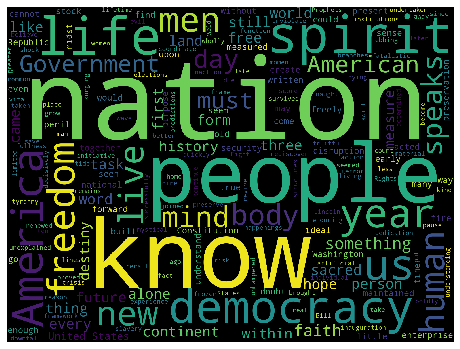

In [92]:
from wordcloud import WordCloud,STOPWORDS

print("Wordcloud for President Roosevelt's speech is below")

wordcloud = WordCloud(stopwords=stopwords, width=2000, height=1500).generate(X)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Wordcloud for President Kennedy's speech is below


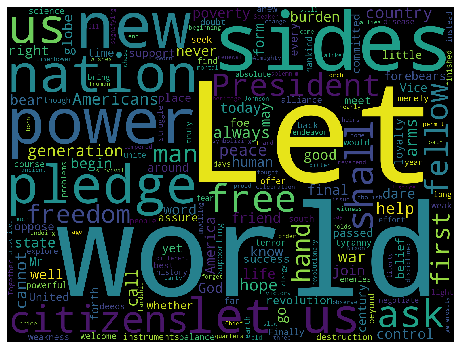

In [93]:
from wordcloud import WordCloud,STOPWORDS

print("Wordcloud for President Kennedy's speech is below")

wordcloud = WordCloud(stopwords=stopwords, width=2000, height=1500).generate(Y)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Wordcloud for President Nixon's speech is below


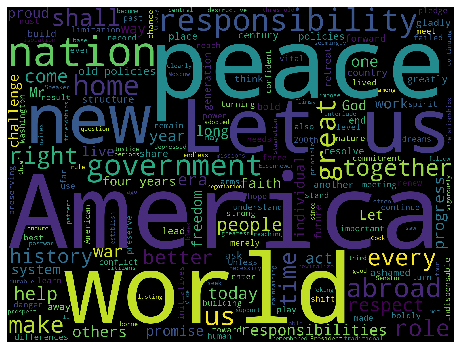

In [94]:
from wordcloud import WordCloud,STOPWORDS

print("Wordcloud for President Nixon's speech is below")

wordcloud = WordCloud(stopwords=stopwords, width=2000, height=1500).generate(Z)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()